In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This dataset contains daily pickup data for 329 FHV (for-hire vehicle) companies from January 2015 through August 2015.

In [2]:
data = pd.read_csv('../data/other-FHV-services_jan-aug-2015.csv')

In [3]:
data.head()

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles
0,B00013,LOVE CORP CAR INC,01/01/2015,26,17
1,B00014,NY ONE CORP CAR INC,01/01/2015,45,24
2,B00029,COMMUNITY CAR SVC CORP,01/01/2015,731,36
3,B00053,CHARGE AND RIDE INC,01/01/2015,10,9
4,B00095,LIBERTY CAR SERVICE INC.,01/01/2015,814,62


In [4]:
data.shape

(26181, 5)

In [5]:
data.describe()

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles
count,26181,26181,26181,26181,26181
unique,334,329,243,1906,445
top,B02147,"MITA LIMOUSINE, INC.",05/13/2015,1,-
freq,212,212,212,988,1716


In [6]:
data.isnull().sum()

Base Number           0
Base Name             0
Pick Up Date          0
Number of Trips       0
Number of Vehicles    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26181 entries, 0 to 26180
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Base Number         26181 non-null  object
 1   Base Name           26181 non-null  object
 2   Pick Up Date        26181 non-null  object
 3   Number of Trips     26181 non-null  object
 4   Number of Vehicles  26181 non-null  object
dtypes: object(5)
memory usage: 1022.8+ KB


In [12]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
}

In [8]:
data['Pick Up Date'] = pd.to_datetime(data['Pick Up Date'])

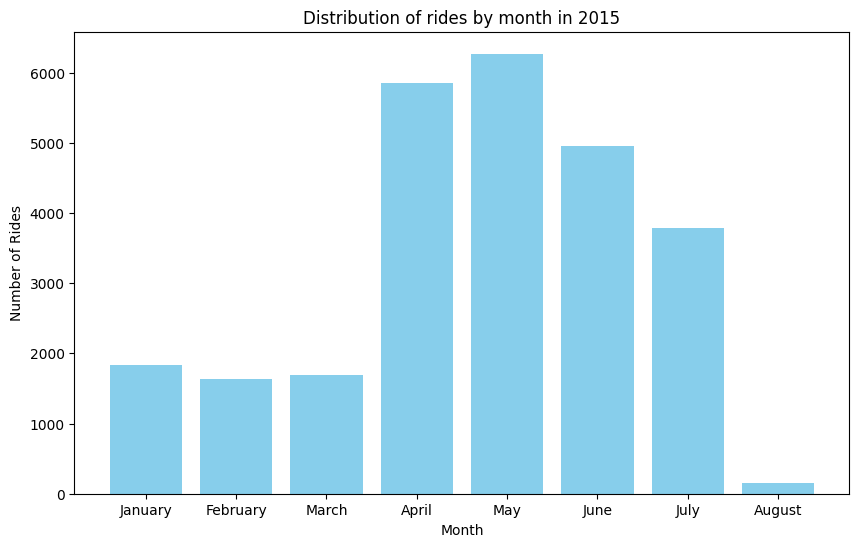

In [19]:
data['Month'] = data['Pick Up Date'].dt.month
months_data = data['Month'].value_counts().rename(index=month_mapping)
months_data = months_data.reindex(index=list(month_mapping.values()))

plt.figure(figsize=(10, 6))
plt.bar(months_data.index, months_data.values, color='skyblue')
plt.title('Distribution of rides by month in 2015')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

We have the most data for April, May, June and July, slightly less for the first three months of the year, while the amount of data for August is negligible.

In [10]:
data

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles,Month
0,B00013,LOVE CORP CAR INC,2015-01-01,26,17,1
1,B00014,NY ONE CORP CAR INC,2015-01-01,45,24,1
2,B00029,COMMUNITY CAR SVC CORP,2015-01-01,731,36,1
3,B00053,CHARGE AND RIDE INC,2015-01-01,10,9,1
4,B00095,LIBERTY CAR SERVICE INC.,2015-01-01,814,62,1
...,...,...,...,...,...,...
26176,B02666,"D.L.C. LIMOUSINE SERVICE, INC.",2015-08-30,4,3,8
26177,B01313,JOY CAR SERVICES INC.,2015-08-31,14,14,8
26178,B01509,"BRUNWISH ENTERPRISES,LTD.",2015-08-31,736,63,8
26179,B01614,R TRANSPORT INC,2015-08-31,45,8,8


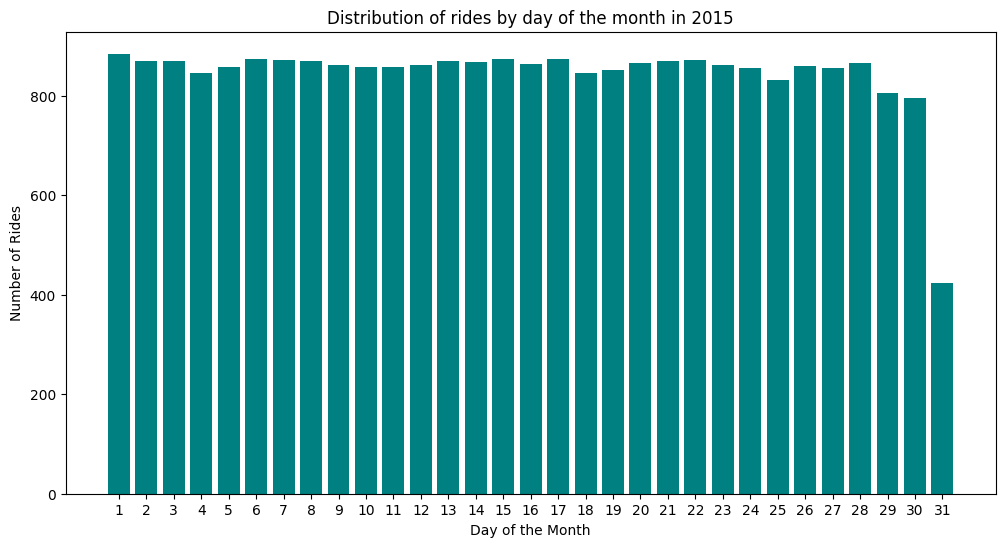

In [20]:
data['Day'] = data['Pick Up Date'].dt.day

days_count = data['Day'].value_counts().sort_index()

days_count = days_count.reindex(range(1, 32), fill_value=0)

plt.figure(figsize=(12, 6))
plt.bar(days_count.index, days_count.values, color='teal')
plt.title('Distribution of rides by day of the month in 2015')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 32))  
plt.show()

This barplot doesn't help our analysis much, because the number of rides is relatively evenly distributed by day, except of course the 31st, because not all months have 31 days.